![Human Resource](https://www.techfunnel.com/wp-content/uploads/2018/04/Crucial-Changes-in-Human-Resource-Management-due-to-Technology.jpg)

I will analyze and visualize the data to answer questions about promotion in a company as well as research the correlation among the factors. Which criteria will affect the promotion? Is education important for promotion? How about age and length of service? Does the previous rating of the previous year also affect the promotion of this year? Are there any relationships among the criteria? I will explore and analyze the HR datasets to see whether employees were promoted and the effect of criteria such as education, gender, age, KPI meet, etc to their promotion.

## Explanation of each column
* **employee_id**: The unique ID of the employee.
* **department**: The department of the employee.
* **region**: The region of the employee (unordered).
* **education**: The education degree of the employee.
* **gender**: The gender of the employee.
* **recruitment_channel**: The channel that the employee is recruited.
* **no_of_trainings**: Number of trainings on soft skills, technique skills, etc. of the employee 
* **age**: The age of employee
* **previous_year_rating**: The rating of previous year of the employee in scores
* **length_of_service**: The length of service of the employee in years
* **KPIs_met >80%**: Whether the employee meets above 80% of KPIs
* **awards_won?**: Whether the employee won the awards in the previous year
* **avg_training_score**: The average score of employee in training evaluations
* **is_promoted**: Whether the employee is promoted

The varibales `gender` has abbreviation forms as follows:

*   f: female
*   m: male

The variables of `KPIs_meet >80%`, `awards_won?`, and `is_promoted` numbers are as follows

0. No
1. Yes

## Loading and reading the data

In [ ]:
import numpy as np 
from numpy.polynomial.polynomial import polyfit
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore") #ignore warnings later

In [ ]:
employee_promotion = pd.read_csv("/kaggle/input/hranalysis/train.csv")
employee_promotion.head()

### Overall checking and cleaning data

Set the emplyee_id as the index

In [ ]:
employee_promotion = employee_promotion.set_index('employee_id')
employee_promotion.head()

In [ ]:
# Checking the shape
employee_promotion.shape

The data has 54,808 cases (employees) and 13 columns (variables)

In [ ]:
# Checking missing values
employee_promotion.isnull().sum()

Only column `education` and `previous_year_rating` have missing values

In case there are some duplicate values, I `drop_duplicates()`

In [ ]:
employee_promotion = employee_promotion.drop_duplicates()
employee_promotion.shape

Now, the data has 54,690 rows left

# Data Analysis

## **Check the maximum, minimum, and average values of quantitative variables**  `no_of_trainings`, `age`, `previous_year_rating`, `length_of_service` and `avg_training_score`

**Maximum values**

In [ ]:
print(
    'Max Number of training:', employee_promotion.no_of_trainings.max(),
   '\nMax Age:', employee_promotion.age.max(),
   '\nMax Previous year rating:', employee_promotion.previous_year_rating.max(), 
   '\nMax Length of service:', employee_promotion.length_of_service.max(), 
   '\nMax Average training score:', employee_promotion.avg_training_score.max())

**Minimum values**

In [ ]:
print(
    'Min Number of training:', employee_promotion.no_of_trainings.min(), 
   '\nMin Age:', employee_promotion.age.min(), 
   '\nMin Previous year rating:', employee_promotion.previous_year_rating.min(), 
   '\nMin Length of service:', employee_promotion.length_of_service.min(),  
   '\nMin Average training score:', employee_promotion.avg_training_score.min())

Based on the maximum and minimum values, I can see that 
* All employees have training before with at least 1 year of training. 
* The previous year's rating is on a 1 to 5 scale. 
* There is a difference of 36 years between who has the longest length of service and who has the shortest length of service. 
* The average training score is between 39 and 99.

Besides, while the undergraduate students graduate at the average age of 22, some people become employees of the company when they are 20 years old. Check the data to see how many of them.

In [ ]:
employee_promotion.loc[employee_promotion['age'] == 20].shape

There are 110 employees who are 20 years old

**Average values**

In [ ]:
print(
    'Ave Number of training:', employee_promotion.no_of_trainings.mean(), 
   '\nAve Age:', employee_promotion.age.mean(), 
   '\nAve Previous year rating:', employee_promotion.previous_year_rating.mean(), 
   '\nAve Length of service:', employee_promotion.length_of_service.mean(), 
   '\nAve Average training score:', employee_promotion.avg_training_score.mean())

The average length of service is about 5.87 years, which means there might be not many employees who have 37 years of service (maximum values of length of service). Check the data to reconfirm

In [ ]:
employee_promotion.loc[employee_promotion['length_of_service'] == 37]

There is only one person who serves for 37 years. This employee is considered an outlier of the length_of_service data

## **Visualize the distribution of the data for each variable**

To have an overall view of the data, I visualize the distribution of the data for each variable by histograms

In [ ]:
# Graph the histograms for quantitative variables
employee_promotion.hist(edgecolor='black', 
                        linewidth=1, 
                        figsize=(15, 15))
plt.show()

Overall, based on the  distribution graphs, I can see that

* Most employees have 1 time of training. 

* Most employees are from 30 to 35 years old in the company.

* Most employees have the previous year rating between 3.0 to 3.5.

* Most employees have below 10 years of service.

* Many employees do not meet the KPIs (key performance indicator).

* The employees who won the awards equal less than 1/50 of the number of those who did not win.

* More employees have the average training score of 50 and 60 than other scores.

* Approximately 1/10 of employees are promoted.

## **Question 1: Are there any correlations amongs the features in the dataset? Are there any correlations between promotion and other factors?**

I will visualize a correlation matrix to see the correlation among the factors by an annotated heatmap

In [ ]:
# Set up the size of the figure
plt.figure(figsize=(10, 10))

# Plot the heatmap with annotations
# diverging_palette(20, 220, n=200) makes a diverging palette between two colors in seaborn
matrix = sns.heatmap(
    employee_promotion.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot = True,
    square = True)

# Adjust lables on x-axis
matrix.set_xticklabels(
    matrix.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.show()

The values in each square indicate the correlation coefficient. If the correlation coefficient is nearing +1, there is a strong positive relation between the 2 variables. If the correlation coefficient is nearing -1, there is a strong negative relation between the 2 variables. A correlation coefficient near zero means there is an absence of any relationship between 2 variables.

I can infer from the heatmap that there are positive correlations between the `length_of_service` and `age`. There are positive correlations between the `previous_year_rating` and `KPIs_met > 80%`.
There is no correlation between the `length_of_service` and the `previous_year_rating` as well as between the `age` of employees and the `previous_year_rating`.
However, there a slight negative correlation between the `length_of_service` and `KPIs_met > 80%` as well as between the `avg_training_score` and the `age` of employees.

Four factors have a positive correlation with promotion are `previous_year_rating`, `KPIs_met > 80%`, `awards_won?`, and `avg_training_score`.
Especially, `KPIs_met > 80%` has the highest positive correlation, and `awards_won?` has the second-highest positive correlation. However, there is a slight negative correlation between the `no_of_trainings` and `is_promoted`.

Because the varibles `KPIs_met >80%` and `previous_year_rating` do not have many values (they just have 0 and 1 for No and Yes), I focus on plotting the scatter plots to perform the correlations between quantitive variables which have many values instead.

**The positive correlation between the `length_of_service` and `age` of the employees:**

In [ ]:
# Graph the scatterplot between length of service and age
x = employee_promotion.age
y = employee_promotion.length_of_service
plt.plot(x, y, '.') 

# Plot the best fit line over the scatter plot with np.polyfit
# Use unique(x) to handle the case where x isn't sorted 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

# Label the axis and the graph
plt.title('Correlation between length of service and age')  
plt.xlabel('Age of employees')  
plt.ylabel('Length of service of employees')  

plt.show()

**The slightly negative correlation between the `avg_training_score` and `age` of the employees:**

In [ ]:
# Graph the scatterplot between averge score of trainings and age
x = employee_promotion.age
y = employee_promotion.avg_training_score
plt.plot(x, y, '.', color='green') 

# Plot the best fit line over the sactter plot with np.polyfit
# Use unique(x) to handle the case where x isn't sorted 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='blue')

# Label the axis and the graph
plt.title('Correlation between averge score of training and age')  
plt.xlabel('Age of employees')  
plt.ylabel('Averge score of training of employees') 
 
plt.show()

As expected, older employees have a longer length of service. However, there is 
no assurance that those who are older have a higher average score of training. There is a slightly negative correlation between the average score of training and the age of employees.

## **Question 2: What are the factors having effection on the promotion of employees? Are there any bias on the promotion with other factors such as Education, Gender, Department, etc.?**

Firstly, I check the number of promoted employees and the percentage of these employees over the total of employees in the company.



In [ ]:
# Count how many employee who are promoted and not promoted
print('There are', len(employee_promotion.loc[employee_promotion['is_promoted'] == 1]['is_promoted']), 'employees who are promoted')
print('There are', len(employee_promotion.loc[employee_promotion['is_promoted'] == 0]['is_promoted']), 'employees who are not promoted')

# Calculate percentage of promoted employees
print('The percentage of promoted employees is {:.2f}%'.format(100 * employee_promotion['is_promoted'].sum() / len(employee_promotion['is_promoted'])))

Plot the bar chart to show the distribute of employees who are promoted and not promoted

In [ ]:
# Plot the bar chart
bar_chart = employee_promotion['is_promoted'].value_counts().plot(kind='bar')

# Add labels, a title, and a legend
plt.title('Distribution of employees who are promoted and not promoted')
plt.xlabel('Promotion')
plt.ylabel('Number of employees')
plt.legend(['1: Is Promoted \n0: Not Promoted'])

# Adjust the lables on x-axis
plt.xticks(rotation='horizontal')

plt.show()

Based on the matrix heatmap above, I can predict 4 factors that have a positive correlation with the promotion are Rating of the previous year, KPIs meet above 80%, Winning awards, and Average training score.

Also, there are slightly negative correlations between the number of training and promotion.

There are 7 out of 11 related-promotion variables that are considered in the matrix. The rest of the variables is categorical, so I will visualize them to analyze the relationship between these variables and promotion by using stacked bar graphs. I can also see how they affect promotion as well as determine whether other factors have an effect or bias on promotion.

Normally, I can use scatter plots to show the correlation between two variables. However, in the dataset, `is_promoted` only has 2 values 0 for No and 1 for Yes to perform whether an employee gets promoted. Therefore, to show the correlation between `is_promoted` and other factors, I use stacked bar graphs instead.

Instead of melting data frame to get long form data, I use [cross tabulation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) of two factors which  quantitatively analyzes the relationship between two variables

**The correlation between Department and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['department'], employee_promotion['is_promoted'])

# Graph the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['lightcoral', 'green'],
                                                   figsize = (15, 5))

# Add a title and labels
plt.title('Correlation between Department and Promotion of employees')
plt.xlabel('Department')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Overall, there is no big difference in the number of employees who are promoted in every department. However, there is a slightly greater number of promoted employees from the department Analytics, Operations, Procurement, and Technology.

**The correlation between Region and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['region'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['coral', 'blue'],
                                                   figsize = (20, 5))

# Add a title and labels
plt.title('Correlation between Region and Promotion of employees')
plt.xlabel('Region')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

plt.show()

Overall, there is no big difference in the number of employees who are promoted in each region. However, there are a small greater number of promoted employees from regions 3, 4, 7, 17, 22, 23, 25, and 28. However, I cannot see any trend from the above graph.

**The correlation between Education and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['education'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['peru', 'teal'],
                                                   figsize = (8, 4))

# Add a title and labels
plt.title('Correlation between Education and Promotion of employees')
plt.xlabel('Education')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Overall, there is no bias in the education in the promotion. Employees who have any education level can have an equal chance to get promoted.

**The correlation between Gender and Promotion of empolyees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['gender'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['brown', 'forestgreen'],
                                                   figsize = (7, 5))

# Add a title and labels
plt.title('Correlation between Gender and Promotion of employees')
plt.xlabel('Gender')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Overall, there is no difference in the number of employees who get promoted from two genders. Therefore, there is no bias in gender in the promotion of this company.

**The correlation between Recruitment Channel and Promotion of empolyees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['recruitment_channel'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['darkorange', 'steelblue'],
                                                   figsize = (8, 5))

# Add a title and labels
plt.title('Correlation between Recruiment Chanel and Promotion of employees')
plt.xlabel('Recruitment Channel')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

There is a slightly greater chance for employees who are recruited from a referred channel rather than those who are from other channels. However, there is no big difference in the number of promoted employees among these three recruitment channels.

**The correlation between Number of trainings and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['no_of_trainings'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['salmon', 'navy'],
                                                   figsize = (15, 5))

# Add a title and labels
plt.title('Correlation between Number of trainings and Promotion of employees')
plt.xlabel('Number of trainings')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

There is a negative correlation between the number of training and the chance of getting promoted by employees. Most of those who have more than 7 training is not promoted. There is a trend that those who have less training have a higher chance of being promoted

**The correlation between Age and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['age'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['hotpink', 'seagreen'],
                                                   figsize = (20, 5))

# Add a title and labels
plt.title('Correlation between Age and Promotion of employees')
plt.xlabel('Age')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Overall, there is no big difference in the number of promoted employees in terms of age. Even the freshers who are 20 years old can also have a chance to get a promotion. However, the group of employees from 27 to 44 years old has a slightly higher chance of being promoted.

Although it looks like employees who are 57 years old have the least chance of getting a promotion, I cannot conclude that because the variable `age` has many outliers with those who are older than 55 years old. Therefore, the number of promoted employees who are 57 years old is not enough to conclude that this group of employees has the least chance of promotion.

**The correlation between Rating of the previous year and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['previous_year_rating'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['chocolate', 'lime'],
                                                   figsize = (10, 5))

# Add a title and labels
plt.title('Correlation between Rating of the previous year and Promotion of employees')
plt.xlabel('Previous year rating')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

I can see the number of promoted employees increases as the previous year's rating increases. There is a trend that the higher rating of the previous year, the higher chance of getting promoted. Therefore, the rating of the previous year might affect the promotion of employees.

**The correlation between Length of service and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['length_of_service'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['indianred','indigo'],
                                                   figsize = (20, 5))

# Add a title and labels
plt.title('Correlation between Length of service and Promotion of employees')
plt.xlabel('Length of service in years')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Although there is a difference in promotion in terms of length of service of employees, I do not have any reliable trend between the length of service and promotion. Those who have from 1 to 23 years of service would have almost equal chances to be promoted.

There is a fluctuation in the chance of promotion for employees who work for 24 years or above. Look back at the average length of service I calculated above,I can know that there are not many employees who have a lot of years of service (there are many outliers for above 24 years of service). Therefore, the number of promoted employees who work 24 years or above is not big enough to conclude the trend if they are promoted. For example, there is 1 person who works for 37 years, and he/she is not promoted. I cannot conclude that those who work for 37 years do not have a chance of getting promoted as those who have different lengths of service.

**The correlation between Average training score and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['avg_training_score'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['bisque','deepskyblue'],
                                                   figsize = (20, 5))

# Add a title and labels
plt.title('Correlation between Average training score and Promotion of employees')
plt.xlabel('Average score of training')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower left')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

The chance of getting promoted increases as the average training score increases. Especially, employees who have an average score of 94 or above have pretty high chances of being promoted. Therefore, the average training score might affect the promotion of employees.

**The correlation between Meeting above 80% of KPIs and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['KPIs_met >80%'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['goldenrod','darkturquoise'],
                                                   figsize = (6, 5))

# Add a title and labels
plt.title('Correlation between Meeting above 80% of KPIs and Promotion of employees')
plt.xlabel('Meeting above 80% of KPIs - 0: No - 1: Yes')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Employees who met above 80% of the KPIs have a higher chance of getting promoted. KPIs meeting is also a factor that can affect the promotion.

**The correlation between Winning awards and Promotion of employees**

In [ ]:
# Compute a simple cross tabulation of two factors
data = pd.crosstab(employee_promotion['awards_won?'], employee_promotion['is_promoted'])

# Plot the stacked bar plot
plot = data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   color = ['maroon','orchid'],
                                                   figsize = (6, 5))

# Add a title and labels
plt.title('Correlation between Winning awards and Promotion of employees')
plt.xlabel('Winning awards - 0: No - 1: Yes')
plt.legend(['Not Promoted', 'Is Promoted'], loc='lower right')

# Adjust the lables on x-axis
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=360,
    horizontalalignment='right');

plt.show()

Employees who won awards have a higher chance of getting a promotion. Winning awards is also a factor that can affect the promotion of employees

AsI expect, four factors Rating of the previous year, Meeting above 80% of KPIs, Winning awards, and Average training score affect the promotion of employees in this company. In that, the Average training score may affect the promotion the most.

Besides, there is no bias on the promotion of employees with factors including Department, Region, Education, Gender, Recruitment channel, Age, and Length of service.

## **Question 3: Make more insightful analysis on Analytics department**

Firstly, I extract employees who are from Analytics department

In [ ]:
ana_employee = employee_promotion.loc[employee_promotion['department'] == 'Analytics']
ana_employee.head()

In [ ]:
ana_employee.shape

There are 5341 employees working in Analytics department.

I calculate the percentage of promoted employees in total employees of the Analytics department and the percentage of Analytics employees getting promotion in the total promoted employees.

In [ ]:
# the percetange of promoted employees in total employees of Analytics department
promoted_ana_employee = ana_employee.loc[ana_employee['is_promoted'] == 1]
print('There are', len(promoted_ana_employee), 'promoted employees over', len(ana_employee['is_promoted']), 'employees in Analytics department')
print('It is about', round(100 * len(promoted_ana_employee) / len(ana_employee['is_promoted']), 2), '%')

In [ ]:
# the percentage of Analytics employees getting promotion in the total promoted employees
promoted_employee = employee_promotion.loc[employee_promotion['is_promoted'] == 1]
print('There are', len(promoted_ana_employee), 'promoted Analytics employees over', len(promoted_employee), 'promoted employees in the company')
print('It is about', round(100 * len(promoted_ana_employee) / len(promoted_employee), 2), '%')

About 9.57% of total employees in the Analytics department get promoted. There is about 10.95% of Analytics promoted employees of the company come from the Analytics department.

We will distribute the quantitive variables of `ana_employee`

In [ ]:
ana_employee.hist(edgecolor='black', 
                        linewidth=1, 
                        figsize=(15, 15))
plt.show()

Based on the above histograms, I can see that
* Most employees in the Analytics department have 1 training.
* Most people from this department are from 30 to 35 years old.
* The most popular previous year rating in this department is 3.
* Most people in the Analytics department have under 5 years of service.
* Many Analytics employees did not meet 80% of KPIs, but there are more than 2100 of over 5300 employees met above 80% of KPIs.
* Only about 1/50 employees from the Analytics department won awards.
* The average training score of most people from this department is from 85 to 87.
* Again, only about 9% of employees from that department get promoted.

I will distribute some nominal variables of `ana_employee` such as Gender, Education, and Recruitment channel

In [ ]:
# Distribution of Gender
plt.figure(figsize=(6,6))
ana_employee['gender'].value_counts().plot(kind='pie', subplots=True, labels = ['Male','Female'])
plt.ylabel('')                                              
plt.title('Distribution of Gender in Analytics department')
plt.legend()
plt.show()

There are more male employees than female employees (more than 80% of employees in the Analytics department are male).

In [ ]:
# Distribution of Education
plt.figure(figsize=(6,7))
ana_employee['education'].value_counts().plot(kind='pie', subplots=True, labels = ["Bachelor's","Master's & above"])

plt.ylabel('')                                              
plt.title('Distribution of Education in Analytics department')
plt.legend()
plt.show()

There is no employees who have education level of Below Secondary in this department, and there are more employees who have Bachelor's than Master's and above.

In [ ]:
# Distribution of Recruitment channels
plt.figure(figsize=(6,7))
ana_employee['recruitment_channel'].value_counts().plot(kind='pie', subplots=True, labels = ['other','sourcing', 'referred'])

plt.ylabel('')                                              
plt.title('Distribution of Recruitment channels in Analytics department')
plt.legend()
plt.show()

The most recruitment channels in Analytics department are other and sourcing.

# **Linear Regression model to predict the Average score of training of the employees?**

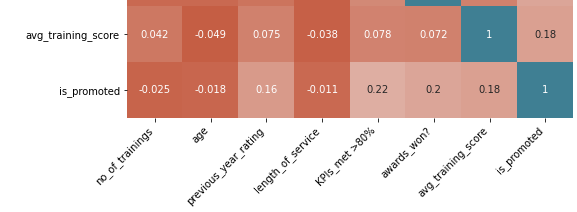


From the heatmap matrix above, I know that the average score of training of the employees has a positive correlation with Meeting above 80% of KPIs, Winning awards, Rating of the previous year, and Promotion. Therefore, I build the model based on `KPIs_met >80%`, `awards_won?`, `avg_training_score`, and `is_promoted`

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

Denote X to be the features and Y to be the Average score of trainings of the employees. I will use X to predict Y.

I will work on the data frame, so I make a copy of the original dataset

In [ ]:
employee_promotion1 = employee_promotion.copy()

Check the values in column `is_promoted`

In [ ]:
employee_promotion1['is_promoted'].value_counts()

I use one-hot encoding to add 2 new columns to my model, one for not getting promoted and one for getting promoted

In [ ]:
employee_promotion1['get_promoted'] = employee_promotion1.is_promoted.map(lambda x: 1 if x == 1 else 0)
employee_promotion1['not_get_promoted'] = employee_promotion1.is_promoted.map(lambda x: 1 if x == 0 else 0)

In [ ]:
features_list = ['KPIs_met >80%', 'awards_won?', 'previous_year_rating',
                 'get_promoted', 'not_get_promoted'] 
X_train, X_test, y_train, y_test = train_test_split(employee_promotion1[features_list],
                                                        employee_promotion1.avg_training_score, 
                                                        test_size=0.20, 
                                                        random_state=997)
model = LinearRegression()

Because the data includes missing values that makes sklearn do work well, I handle the that by replacing missing data with the mean, using the [`SimpleImputer`](https://scikit-learn.org/stable/modules/impute.html) class.

In [ ]:
# Create imputer to replace missing values with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute the data, then train the data
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)

model = model.fit(X_train_imp, y_train)
predict_array = model.predict(X_test_imp)

Evaluate my model

In [ ]:
print(mean_absolute_error(y_test, predict_array))
print(mean_squared_error(y_test, predict_array))
print(r2_score(y_test, predict_array))

The $R^2$ score  (a measure of how close the data are to the regression line) is significantly low, so I need to consider other features to my model. I will add all the rest of the other features including nominal variables to my model to have a more accurate model.

Check how many values in column `department`

In [ ]:
employee_promotion1['department'].value_counts()

I use one-hot encoding to add 9 new columns to my model, one for each department by using for loop

In [ ]:
departments = ['Sales & Marketing', 'Operations', 'Technology', 'Procurement', 'Analytics', 'Finance', 'HR', 'Legal', 'R&D']
for dep in departments: # use dep to avoid being confused with department column
  employee_promotion1[dep] = employee_promotion1.department.map(lambda x: 1 if x == dep else 0)

Check how many values in column `region`

In [ ]:
employee_promotion1['region'].value_counts()

Because the regions are not ordinal, I cannot encode them as ordinal. Insteads, I will use one-hot encoding to add 34 new columns to my model, one for each region.

In [ ]:
# Create a list of 34 regions, the order doesn't matter in here
regions = []
for i in range(1, 35):
  regions.append('region_' + str(i))

# Use for loop to add 34 columns, one for each region
for reg in regions:
  employee_promotion1[reg] = employee_promotion1.region.map(lambda x: 1 if x == reg else 0)

Check how many values in column `education`

In [ ]:
employee_promotion['education'].value_counts()

I use one-hot encoding to add 3 new columns to my model, one for each education level

In [ ]:
educations = ["Bachelor's ", "Master's & above", "Below Secondary"]
for edu in educations:
  employee_promotion1[edu] = employee_promotion1.education.map(lambda x: 1 if x == edu else 0)

Check how many values in column `gender`


In [ ]:
employee_promotion1['gender'].value_counts()

I use one-hot encoding to add 2 new columns to my model, one for each gender

In [ ]:
genders = ['f', 'm']
for gen in genders:
  employee_promotion1[gen] = employee_promotion1.gender.map(lambda x: 1 if x == gen else 0)

Check how many values in column `recruitment_channel`

In [ ]:
employee_promotion1['recruitment_channel'].value_counts()

I use one-hot encoding to add 3 new columns to my model, one for each channel

In [ ]:
channels = ['other', 'sourcing', 'referred']
for cha in channels:
  employee_promotion1[cha] = employee_promotion1.recruitment_channel.map(lambda x: 1 if x == cha else 0)

Take a look at a new data frame

In [ ]:
employee_promotion1.head()

Build the Multiple Linear Regression model based on 58 features (7 quantitives varibles and 51 new added columns)

In [ ]:
features_list = ['KPIs_met >80%', 'get_promoted', 'not_get_promoted', 
                 'awards_won?', 'previous_year_rating', 'no_of_trainings', 'age',
                 'length_of_service'] + departments + regions + genders + channels + educations
X_train1, X_test1, y_train1, y_test1 = train_test_split(employee_promotion1[features_list],
                                                        employee_promotion1.avg_training_score, 
                                                        test_size=0.20, 
                                                        random_state=997)
model1 = LinearRegression()

# Create imputer to replace missing values with the mean 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train1)

# Impute the data, then train the data
X_train_imp1 = imp.transform(X_train1)
X_test_imp1 = imp.transform(X_test1)

model1 = model1.fit(X_train_imp1, y_train1)
predict_array1 = model1.predict(X_test_imp1)

Evaluate my model

In [ ]:
print(mean_absolute_error(y_test1, predict_array1))
print(mean_squared_error(y_test1, predict_array1))
print(r2_score(y_test1, predict_array1))

When I consider more features to my model, I get a better prediction model. My model is accounting for 89.93% now

I will visualize the predicted average training scores and actual average training scores to compare them. 

In [ ]:
# Create a data frame
dis1 = pd.DataFrame({'Actual': y_test1, 'Predicted': predict_array1})
dis1

In [ ]:
# Graph the multiple bar chart 
dis1 = dis1.head(100)
dis1.plot(kind='bar',figsize=(20,10))
plt.show()